In [19]:
#I imported all the used packages here to keep it organized

import os
os.getcwdb()
import nibabel as nib
import matplotlib.pyplot as plt
import glob
import numpy as np

from nilearn import image, plotting
from nilearn.image import smooth_img

Found files: ['C:\\Users\\milak\\OneDrive\\Documenten\\Master\\Cognitive Neuropsychology\\Programming\\anatomical.nii.gz', 'C:\\Users\\milak\\OneDrive\\Documenten\\Master\\Cognitive Neuropsychology\\Programming\\hippocampus_uniformity-test_z_FDR_0.01.nii.gz']
Anatomical: C:\Users\milak\OneDrive\Documenten\Master\Cognitive Neuropsychology\Programming\anatomical.nii.gz
Functional: C:\Users\milak\OneDrive\Documenten\Master\Cognitive Neuropsychology\Programming\hippocampus_uniformity-test_z_FDR_0.01.nii.gz


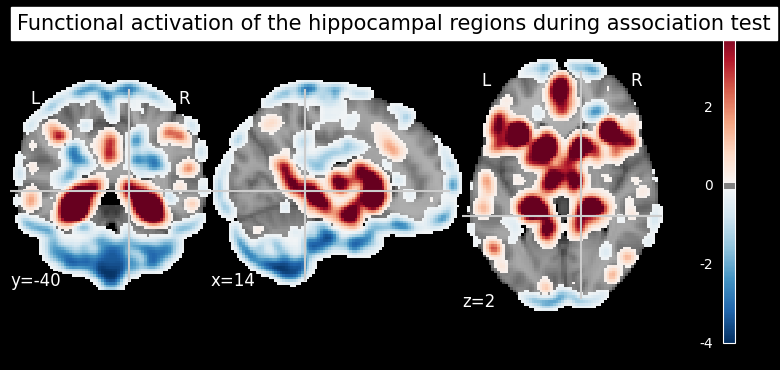

In [ ]:
# Look for all the nii files of the MRI data
folder = r"C:\Users\milak\OneDrive\Documenten\Master\Cognitive Neuropsychology\Programming"
all_files = glob.glob(os.path.join(folder, "*.nii*"))

print("Found files:", all_files)

# I named the anatomical and functional file
anatomical_file = [f for f in all_files if "anatomical" in f.lower()][0]
functional_file = [f for f in all_files if "uniformity" in f.lower()][0]

print("Anatomical:", anatomical_file)
print("Functional:", functional_file)

# Smooth the functional data
smoothed_func = image.smooth_img(functional_file, fwhm=6)

# Plot functional image on top of anatomical scan with customized colour map
# I adjusted the vmax that to clearify in which areas there's functional activity
plotting.plot_stat_map(
    smoothed_func,
    bg_img=anatomical_file,
    cut_coords=(14,-40,2),
    threshold=0.1,
    display_mode='ortho',
    cmap= "RdBu_r",
    vmax= 4,
    colorbar=True,
    title="Functional activation of the hippocampal regions during uniformity test")

plotting.show()



In [1]:
#import the image with nibabel and transform it to a numpy dataset
import nibabel as nib
functional_img = nib.load("hippocampus_uniformity-test_z_FDR_0.01.nii.gz")
functional_data = functional_img.get_fdata()

#printed all positive values, which means all values bigger than 0
positive_values = functional_data[functional_data > 0]

#I checked the values and size of the dataset to determine the size of the histogram
print("Number of positive voxels:", len(positive_values))
print("Min:", positive_values.min(), "Max:", positive_values.max())

#created a histogram
plt.hist(positive_values, bins=50, color='deepskyblue', edgecolor='black')
plt.title("Distribution of functional voxel activity of hippocampal regions during uniformity test")
plt.xlabel("Voxel value")
plt.ylabel("Frequency")

#I added a log scale to improve the visibility of the frequency of all voxel regions 
plt.yscale('log')

#I added a raster to improve the readability of the bars 
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

ModuleNotFoundError: No module named 'nibabel'